In [40]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import StandardScaler, LabelBinarizer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from keras import optimizers
from keras import initializers
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML
# stop annoying tensorflow warning messages
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
print ('modules loaded')

modules loaded


# Creating the Training dataset

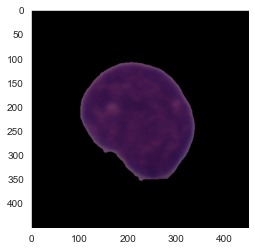

In [2]:
img = image.load_img('data/training_data/ALL/UID_1_6_1_all.bmp')

plt.imshow(img)
plt.grid(False)

In [3]:
cv2.imread('data/training_data/ALL/UID_1_6_1_all.bmp').max()

119

In [4]:
cv2.imread('data/training_data/ALL/UID_1_6_1_all.bmp').shape

(450, 450, 3)

In [22]:
traingen = ImageDataGenerator(rescale=1/255,
                           rotation_range=10, fill_mode='nearest',
                           horizontal_flip=True,
                           vertical_flip=True,
                           brightness_range=[0.6,1.5])

In [23]:
train_dataset = traingen.flow_from_directory(directory='data/training_data',
                                          class_mode='binary',
                                          batch_size=500,
                                          seed=42
                                          )

Found 10661 images belonging to 2 classes.


In [27]:
train_dataset

In [32]:
len(train_dataset.classes)

10661

In [9]:
type(train_dataset)

keras.preprocessing.image.DirectoryIterator

In [45]:
baseline_model = Sequential()

baseline_model.add(layers.Dense(units=64, activation='relu'))
baseline_model.add(layers.Dense(units=1, activation='sigmoid'))

baseline_model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy',
                       metrics=['accuracy']
                      )

baseline_history = baseline_model.fit(train_dataset,
                                     steps_per_epoch=10,
                                     epochs=50,
                                     batch_size=256,
                                     validation_split=0.2,
                                     shuffle=True
                                     )

ValueError: `validation_split` is only supported for Tensors or NumPy arrays, found following types in the input: [<class 'keras.preprocessing.image.DirectoryIterator'>]

# Creating the Testing dataset

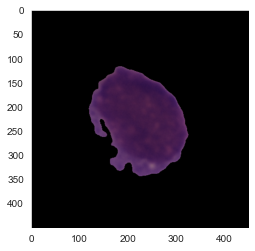

In [10]:
img = image.load_img('data/test_data/7.bmp')

plt.imshow(img)
plt.grid(False)

In [11]:
cv2.imread('data/test_data/7.bmp').max()

131

In [12]:
cv2.imread('data/test_data/7.bmp').shape

(450, 450, 3)

In [14]:
test_df = pd.read_csv('data/test_data/test_data_labels.csv')

test_df = test_df.replace({'labels':{0 : 'ALL', 1 : 'Normal'}})

testgen = ImageDataGenerator(rescale=1/255)

test_dataset = testgen.flow_from_dataframe(test_df,
                                         directory='data/test_data',
                                         x_col='new_names',
                                         y_col='labels',
                                         class_mode='binary',
                                         target_size=(350, 350),
                                         batch_size=1,
                                         seed=42
                                        )

Found 1867 validated image filenames belonging to 2 classes.


In [15]:
test_dataset.class_indices

{'ALL': 0, 'Normal': 1}

In [16]:
test_dataset.classes

[1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,


In [17]:
type(test_dataset)

keras.preprocessing.image.DataFrameIterator

In [18]:
test_dataset[1]

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]], dtype=float3